In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.metrics import *
from src.models import *
from src.preprocessing import *

In [2]:
df = pd.read_csv("data/raw/WAR_class_dev.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   float64
 1   mp            6782 non-null   float64
 2   raptor_total  6782 non-null   float64
 3   pace_impact   6782 non-null   float64
 4   war_class     6782 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 265.1 KB


In [3]:
df.head(60)

,poss,mp,raptor_total,pace_impact,war_class
0,2283.468774,826.890427,-3.369325,0.472195,2
1,1185.081598,567.265296,-5.389056,1.567405,2
2,5272.362761,2403.044668,7.084319,-0.534305,3
3,7594.083790,3709.114977,5.532538,-0.710111,3
4,8479.653469,3803.026613,5.089253,-0.699135,3
5,6783.313142,3068.998628,4.953955,-0.607349,3
6,6937.503004,3284.773472,3.467463,-0.431859,3
7,6655.777290,3333.022120,2.755609,-0.380965,3
8,7016.911712,3355.531715,4.271910,-0.380062,3
9,6558.393051,3024.550550,4.851383,-0.187223,3


In [4]:
# Limpieza: Duplicados 
dups = df.duplicated().sum()
print(f"\nFilas duplicadas (todas las columnas iguales): {dups}")


Filas duplicadas (todas las columnas iguales): 0



Distribución de war_class (conteos y %):


,count,pct
war_class,,
1,2029,29.92
2,2509,36.99
3,2244,33.09


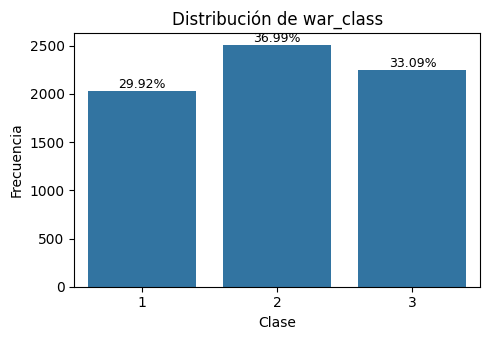

In [5]:
cls_counts = df["war_class"].value_counts(dropna=False).sort_index()
cls_pct = (cls_counts/cls_counts.sum()*100).round(2)
print("\nDistribución de war_class (conteos y %):")
display(pd.DataFrame({"count": cls_counts, "pct": cls_pct}))

plt.figure(figsize=(5,3.5))
sns.barplot(x=cls_counts.index.astype(str), y=cls_counts.values)
plt.title("Distribución de war_class")
plt.xlabel("Clase"); plt.ylabel("Frecuencia")

for i,(x,y) in enumerate(zip(cls_counts.index, cls_counts.values)):
    plt.text(i, y, f"{cls_pct.loc[x]}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout(); plt.show()

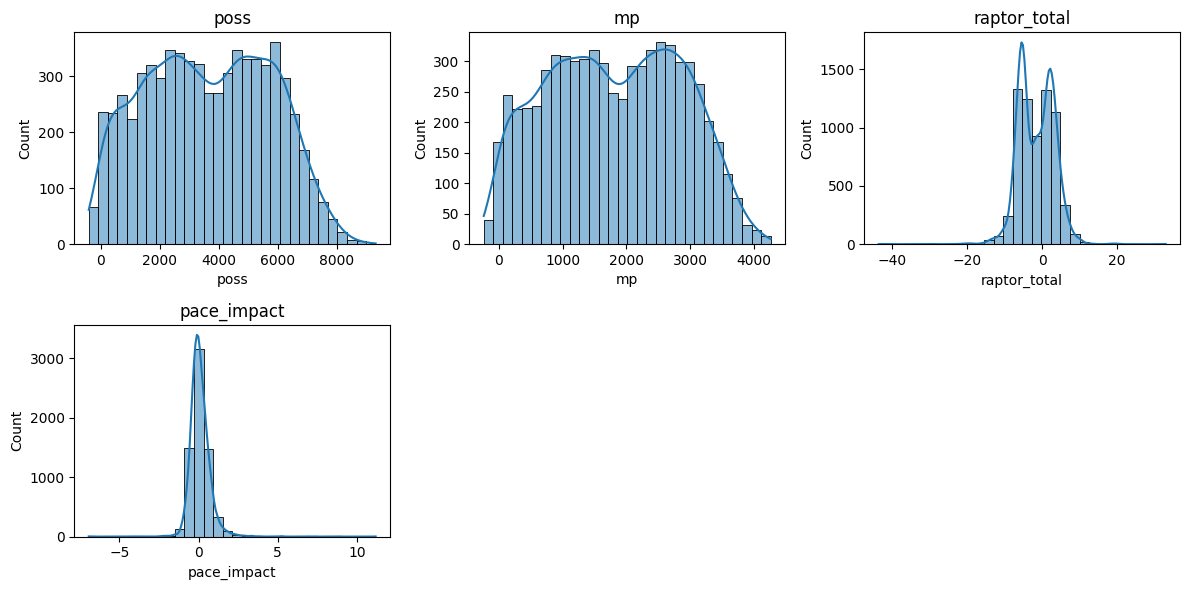

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_feats = [c for c in num_cols if c != "war_class"]

if num_feats:
    n = len(num_feats)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*4, nrows*3))

    for i, c in enumerate(num_feats, 1):
        ax = plt.subplot(nrows, ncols, i)
        sns.histplot(df[c], kde=True, bins=30, ax=ax)
        ax.set_title(c)

    plt.tight_layout(); plt.show()

cambiar (preguntar a chat cual va en cual)
raptor_total presenta algunos extremos (±20–25).

pace_impact tiene pocos puntos fuera del rango típico (±4–6).

poss/mp muestran colas hacia valores muy altos (jugadores con gran carga de minutos/posesiones).

In [7]:
if num_feats:
    grp = df.groupby("war_class")[num_feats]
    desc = grp.agg(["mean", "std", "median"]).round(3)
    print("\nResumen por clase (mean/std/median):")
    display(desc)


Resumen por clase (mean/std/median):


poss                            mp                     \
               mean       std    median      mean      std    median   
war_class                                                              
1          2914.695  1209.213  2766.572  1453.322  598.039  1393.350   
2          2274.825  1781.002  1970.977  1127.047  875.402   996.490   
3          5821.468  1055.440  5856.731  2900.847  506.788  2909.272   

          raptor_total               pace_impact                
                  mean    std median        mean    std median  
war_class                                                       
1               -6.079  1.606 -5.755       0.148  0.452  0.132  
2               -2.165  3.783 -1.739       0.235  0.820  0.149  
3                3.432  1.936  3.081      -0.120  0.521 -0.187

4) Outliers (visuales)

raptor_total presenta algunos extremos (±20–25).

pace_impact tiene pocos puntos fuera del rango típico (±4–6).

poss/mp muestran colas hacia valores muy altos (jugadores con gran carga de minutos/posesiones).

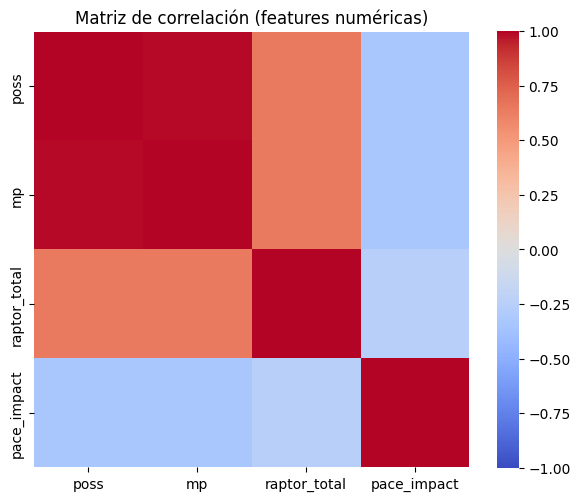

In [8]:
if num_feats:
    corr = df[num_feats].corr(method="pearson")
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", annot=False, square=True)
    plt.title("Matriz de correlación (features numéricas)")
    plt.tight_layout(); plt.show()

5) Correlaciones entre atributos (numéricos)

poss–mp: correlación muy alta (≈ 0.95–0.98 visualmente) → fuerte multicolinealidad.

raptor_total correlaciona positivamente con poss y mp (moderado).

pace_impact muestra correlaciones débiles con el resto.

In [9]:
if "war_class" in df and num_feats:
    tmp = df[["war_class"] + num_feats].dropna()
    targ_corr = tmp[num_feats].corrwith(tmp["war_class"]).sort_values(key=np.abs, ascending=False)
    print("\nCorrelación (Pearson) con war_class (1/2/3):")
    display(targ_corr.to_frame("corr").round(3))


Correlación (Pearson) con war_class (1/2/3):


,corr
raptor_total,0.811
mp,0.567
poss,0.564
pace_impact,-0.168


6) Correlación con la clase (Pearson con war_class)

raptor_total ≈ 0.81 → principal predictor: a mayor RAPTOR, mayor clase (de 1→3).

mp ≈ 0.57 y poss ≈ 0.56 → informativos, pero redundantes entre sí.

pace_impact ≈ −0.17 → señal débil; posible baja importancia.

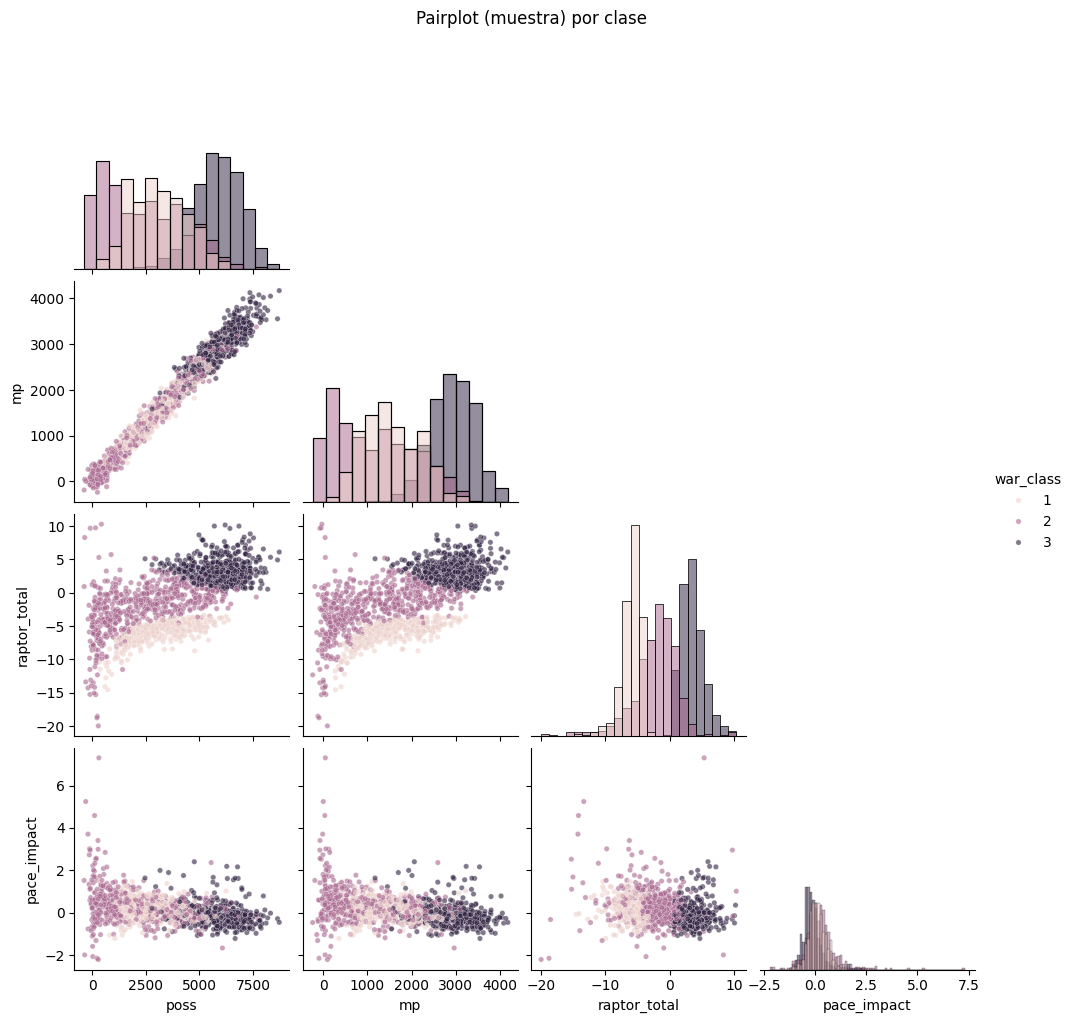

In [ ]:
sample_n = min(1500, len(df))
cols_for_pair = [c for c in num_feats]

if len(cols_for_pair) >= 2:
    plot_df = df[cols_for_pair + ["war_class"]].dropna().sample(sample_n, random_state=42)
    sns.pairplot(plot_df, hue="war_class", corner=True, diag_kind="hist", plot_kws=dict(s=15, alpha=0.6))
    plt.suptitle("Pairplot (muestra) por clase", y=1.02)
    plt.show()

7) Relaciones bivariadas (pairplot)

Separación de clases principalmente a lo largo de raptor_total y (en menor medida) por mp/poss.

Superposición considerable entre clases 1 y 2 para valores bajos de raptor_total.

In [11]:
TARGET = "war_class"
FEATURES = ["poss", "mp", "raptor_total", "pace_impact"] # Vars numericas

df = pd.read_csv("data/raw/WAR_class_dev.csv").copy()

# Limpieza: asegurar tipos numéricos 
for c in FEATURES:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[TARGET] = pd.to_numeric(df[TARGET], downcast="integer")

In [12]:
train_idx, val_idx = stratified_split_idx(df[TARGET].values, test_size=0.20, seed=42)
train_df = df.iloc[train_idx].reset_index(drop=True)
val_df   = df.iloc[val_idx].reset_index(drop=True)

In [13]:
mu = train_df[FEATURES].mean()
sd = train_df[FEATURES].std().replace(0, 1.0)

X_train_raw = train_df[FEATURES].to_numpy(dtype=float)
X_val_raw   = val_df[FEATURES].to_numpy(dtype=float)

X_train = ((train_df[FEATURES] - mu) / sd).to_numpy(dtype=float)
X_val   = ((val_df[FEATURES]   - mu) / sd).to_numpy(dtype=float)

y_train = train_df[TARGET].to_numpy(dtype=int)
y_val   = val_df[TARGET].to_numpy(dtype=int)

print("Raw  :", X_train_raw.shape, X_val_raw.shape, y_train.shape, y_val.shape)
print("Zscore:", X_train.shape, X_val.shape)

preproc_params = {"mu": mu, "sd": sd, "features": FEATURES} # Guardar parámetros para el test


Raw  : (5425, 4) (1357, 4) (5425,) (1357,)
Zscore: (5425, 4) (1357, 4)


In [14]:
# LDA
lda = LDA(reg=1e-4).fit(X_train, y_train)
y_pred_lda = lda.predict(X_val)
print("LDA acc :", accuracy(y_val, y_pred_lda))
print(confusion_matrix(y_val, y_pred_lda))

LDA acc : 1.0
[[  0   0]
 [  0 397]]


In [15]:
# Softmax (logística multiclase) 
soft = SoftmaxRegression(lam=1e-2, lr=0.1, epochs=3000, tol=1e-6, bias=True).fit(X_train, y_train)
y_pred_soft = soft.predict(X_val)
print("Softmax acc :", accuracy(y_val, y_pred_soft))
print(confusion_matrix(y_val, y_pred_soft))

Softmax acc : 1.0
[[  0   0]
 [  0 386]]


In [16]:
# Random Forest 
rf = RandomForest(n_estimators=80, max_depth=12, min_samples_split=5, max_features='sqrt',
                  bootstrap=True, random_state=7).fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("RF acc :", accuracy(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))

RF acc : 1.0
[[  0   0]
 [  0 396]]


In [17]:
lambdas = np.logspace(-4, 2, 15)

classes = np.sort(np.unique(y_train))

lda_model = LDA().fit(X_train, y_train)

rf_model = RandomForest(
    n_estimators=100,      
    max_depth=10,
    min_samples_split=2,
    max_features='sqrt',  
    bootstrap=True,
    random_state=42
).fit(X_train, y_train)

In [18]:
results, pr_curves, roc_curves = [], [], []

# entreno OVA
ova = train_logreg_ova(X_train, y_train, X_val, y_val, lambdas)
P_val, classes = predict_proba_ova(ova, X_val)

eval_and_store_multiclass("LogReg OVA", y_val, P_val, classes, results, pr_curves, roc_curves)

P_val_lda = lda_model.predict_proba(X_val)   # (n, C)
eval_and_store_multiclass("LDA", y_val, P_val_lda, classes, results, pr_curves, roc_curves)

P_val_rf  = rf_model.predict_proba(X_val)    # (n, C)
eval_and_store_multiclass("Random Forest", y_val, P_val_rf, classes, results, pr_curves, roc_curves)

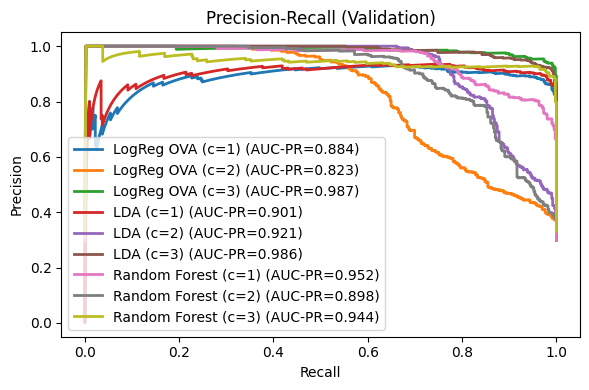

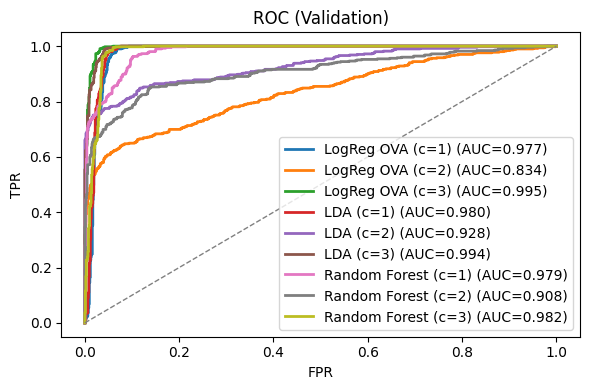

In [ ]:
# PR en mismo gráfico
plt.figure(figsize=(6,4))

for name, rec, prec in pr_curves:
    auc_pr = auc_trapezoid(rec, prec)
    plt.plot(rec, prec, lw=2, label=f"{name} (AUC-PR={auc_pr:.3f})")
    
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall (Validation)")
plt.legend(); plt.tight_layout(); plt.show()

# ROC en mismo gráfico
plt.figure(figsize=(6,4))

for name, fpr, tpr in roc_curves:
    auc_roc = auc_trapezoid(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc_roc:.3f})")

plt.plot([0,1],[0,1],"--",color="gray",lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (Validation)")
plt.legend(); plt.tight_layout(); plt.show()

El problema está bien separable para clases 1 y 3; la confusión principal es con la clase 2 (solapamiento). Un modelo lineal bien regularizado ya funciona muy bien; si se prioriza PR en clase 1, RF puede aportar.

In [ ]:
df_dev  = pd.read_csv("data/raw/WAR_class_dev.csv")
df_test = pd.read_csv("data/raw/WAR_class_test.csv")

# Marcar out-of-range como NaN (se imputan después)
df_dev  = to_nan_out_of_range(df_dev)
df_test = to_nan_out_of_range(df_test)

params           = fit_preprocessor(df_dev)
X_dev,  y_dev    = transform(df_dev,  params)
X_test, y_test   = transform(df_test, params)

classes = np.sort(np.unique(y_dev))

lambdas = np.logspace(-4, 2, 15)
best_lams_ova = {}  
for c in classes:
    y_bin = (y_dev == c).astype(int)
    # pequeño hold-in tuning: elegimos lam por AUC-PR 
    best_auc, best_lam = -1.0, lambdas[0]
    for lam in lambdas:
        m = LogisticRegressionL2(lam=lam, lr=0.1, epochs=4000, tol=1e-6, bias=True).fit(X_dev, y_bin)
        auc_pr = auc_pr_np(y_bin, m.predict_proba(X_dev))
        if auc_pr > best_auc:
            best_auc, best_lam = auc_pr, lam
    best_lams_ova[c] = best_lam

# Entreno OVA definitivo en TODO dev con los lambdas elegidos
ova = []
for c in classes:
    y_bin = (y_dev == c).astype(int)
    lam   = best_lams_ova[c]
    clf   = LogisticRegressionL2(lam=lam, lr=0.1, epochs=4000, tol=1e-6, bias=True).fit(X_dev, y_bin)
    ova.append((c, clf))

lda_model = LDA().fit(X_dev, y_dev)
rf_model  = RandomForest(n_estimators=100, max_depth=10, min_samples_split=2, max_features='sqrt', bootstrap=True, random_state=42).fit(X_dev, y_dev)
P_test_ova, classes_ova = predict_proba_ova(ova, X_test)

# si por alguna razón el orden difiere, reordeno columnas
if not np.array_equal(classes_ova, classes):
    order = [np.where(classes_ova == c)[0][0] for c in classes]
    P_test_ova = P_test_ova[:, order]   # (n, C) en orden de 'classes'

P_test_lda    = lda_model.predict_proba(X_test)  
P_test_rf     = rf_model.predict_proba(X_test)   

In [ ]:
rows = []
rows += eval_multiclass_table("LogReg OVA",   P_test_ova, y_test, classes)
rows += eval_multiclass_table("LDA",          P_test_lda, y_test, classes)
rows += eval_multiclass_table("RandomForest", P_test_rf,  y_test, classes)

df_test_metrics = pd.DataFrame(rows, columns=["Modelo","Clase","Accuracy","Precision","Recall","F1","AUC-ROC","AUC-PR"])
display(df_test_metrics)

,Modelo,Clase,Accuracy,Precision,Recall,F1,AUC-ROC,AUC-PR
0,LogReg OVA,1,0.941627,0.829897,1.000000,0.907042,0.963998,0.797237
1,LogReg OVA,2,0.724057,0.600000,0.774960,0.676349,0.836879,0.811722
2,LogReg OVA,3,0.958726,0.892638,1.000000,0.943274,0.996624,0.992591
3,LDA,1,0.922170,0.785366,1.000000,0.879781,0.965411,0.801630
4,LDA,2,0.875000,0.839546,0.820919,0.830128,0.924180,0.923275
5,LDA,3,0.937500,0.845930,1.000000,0.916535,0.996278,0.992127
6,RandomForest,1,0.806014,0.594828,1.000000,0.745946,0.976541,0.941874
7,RandomForest,2,0.738797,0.602174,0.877971,0.714378,0.893441,0.877833
8,RandomForest,3,0.935731,0.843251,0.998282,0.914241,0.986521,0.959226


Elegiría LogReg OVA para producción por su mejor promedio global (AUC-ROC/PR más altas y F1 superior en 1 y 3). Si el negocio prioriza específicamente la clase 2, consideraría LDA o ajustar umbrales/pesos de LogReg para esa clase.

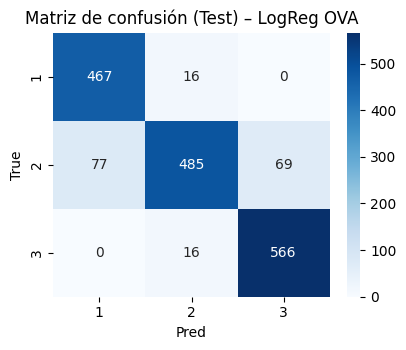

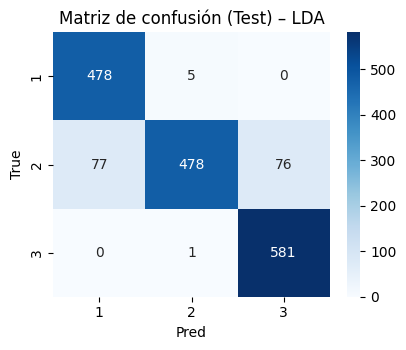

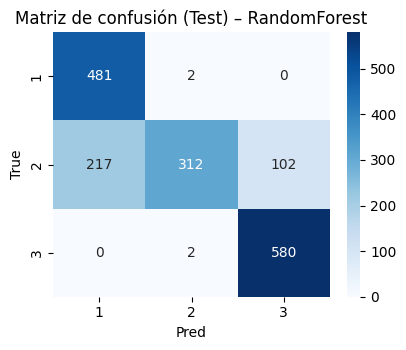

In [ ]:
plot_confusion_multiclass("LogReg OVA",   P_test_ova, y_test, classes)
plot_confusion_multiclass("LDA",          P_test_lda,  y_test, classes)
plot_confusion_multiclass("RandomForest", P_test_rf,   y_test, classes)

Con este dataset la geometría es mayormente lineal; por eso LogReg OVA se parece a LDA dominan, y RF no aporta ganancias claras sin afinar profundidad, n_trees o calibración posterior.

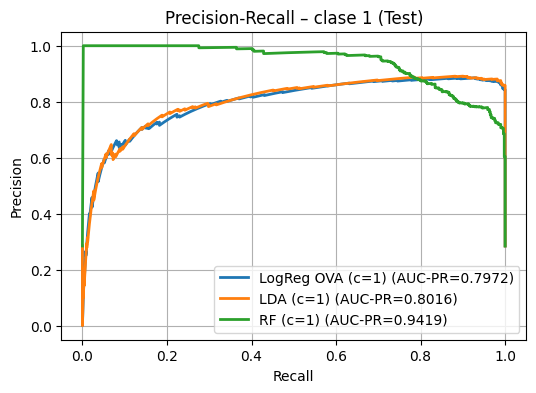

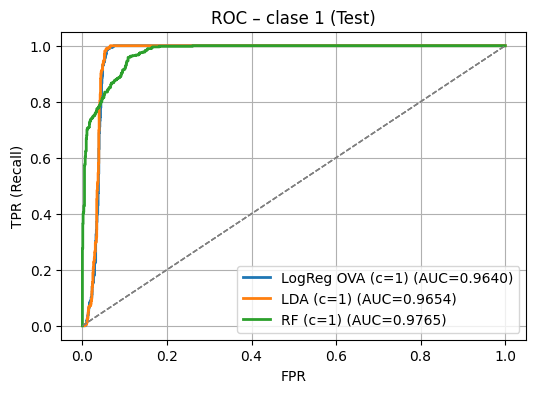

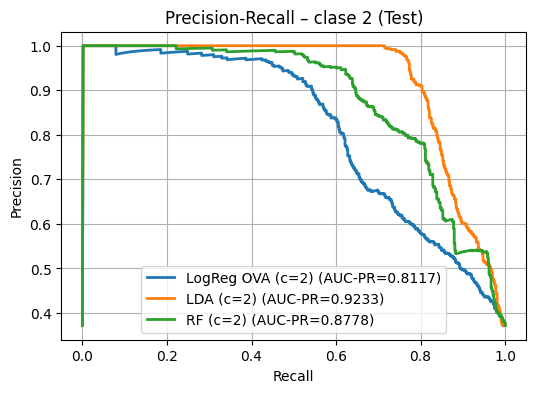

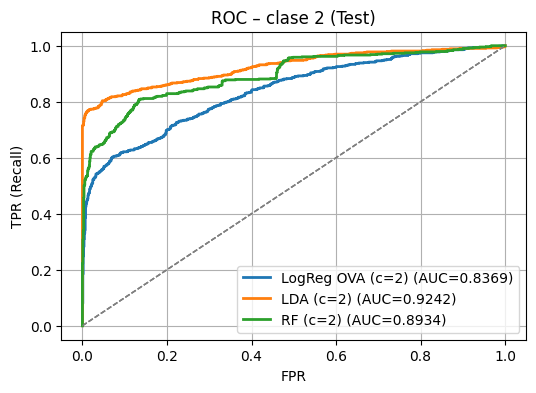

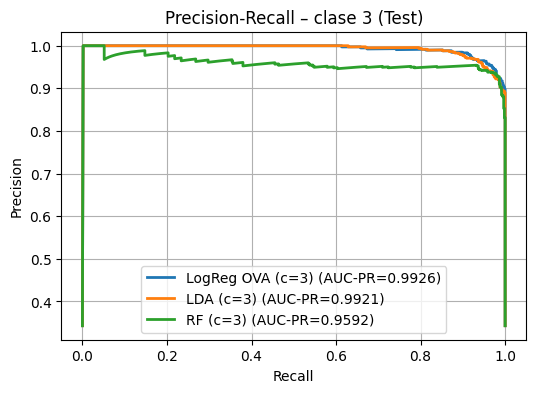

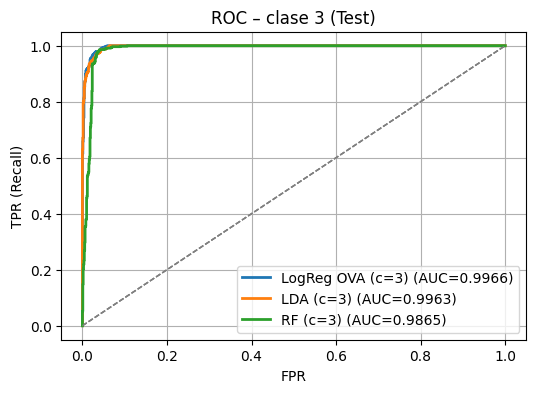

In [23]:
for i, c in enumerate(classes):
    plt.figure(figsize=(6,4))
    ap1 = plot_pr( (y_test==c).astype(int), P_test_ova[:,i], label=f"LogReg OVA (c={c})" )
    ap2 = plot_pr( (y_test==c).astype(int), P_test_lda[:,i],  label=f"LDA (c={c})" )
    ap3 = plot_pr( (y_test==c).astype(int), P_test_rf[:,i],   label=f"RF (c={c})" )
    plt.title(f"Precision-Recall – clase {c} (Test)"); plt.show()

    plt.figure(figsize=(6,4))
    ar1 = plot_roc( (y_test==c).astype(int), P_test_ova[:,i], label=f"LogReg OVA (c={c})" )
    ar2 = plot_roc( (y_test==c).astype(int), P_test_lda[:,i],  label=f"LDA (c={c})" )
    ar3 = plot_roc( (y_test==c).astype(int), P_test_rf[:,i],   label=f"RF (c={c})" )
    plt.title(f"ROC – clase {c} (Test)"); plt.show()

- LDA es el más estable entre clases (sobre todo en la 2).
- Random Forest y LogReg OVA brillan en clases 1 y 3; LogReg sufre más en la 2.
- Si tenés que priorizar recuperar bien la clase 2, LDA es la opción. Si buscás máximo rendimiento medio, RF/LogReg OVA son competitivos y muy parejos.

Si el costo de error en la clase 2 es relevante (donde los falsos negativos o positivos de esa clase duelen más), implementaría LDA en producción por su robustez y consistencia por clase, además de ser simple, rápido e interpretable. Si el objetivo fuera maximizar macro-F1 sin penalización por clases, consideraría LogReg OVA con umbral por clase o incluso un ensemble LDA + LogReg para capturar lo mejor de ambos.

- LDA domina la clase 2; LogReg OVA/ RF son muy fuertes en 1 y 3.
- Las AUC-ROC / AUC-PR y F1 son similares entre validación y test; no hubo degradaciones grandes; la validación fue un buen estimador de la performance final (no se observa un sobreajuste fuerte).